In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [2]:
df= pd.read_csv('Loan.csv')

# Data Understanding

In [4]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [5]:
df.shape

(20000, 36)

In [6]:
df.isna().sum()

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
EmploymentStatus              0
EducationLevel                0
Experience                    0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
NetWorth                      0
BaseInterestRate              0
Interest

In [7]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


<Figure size 5000x5000 with 0 Axes>

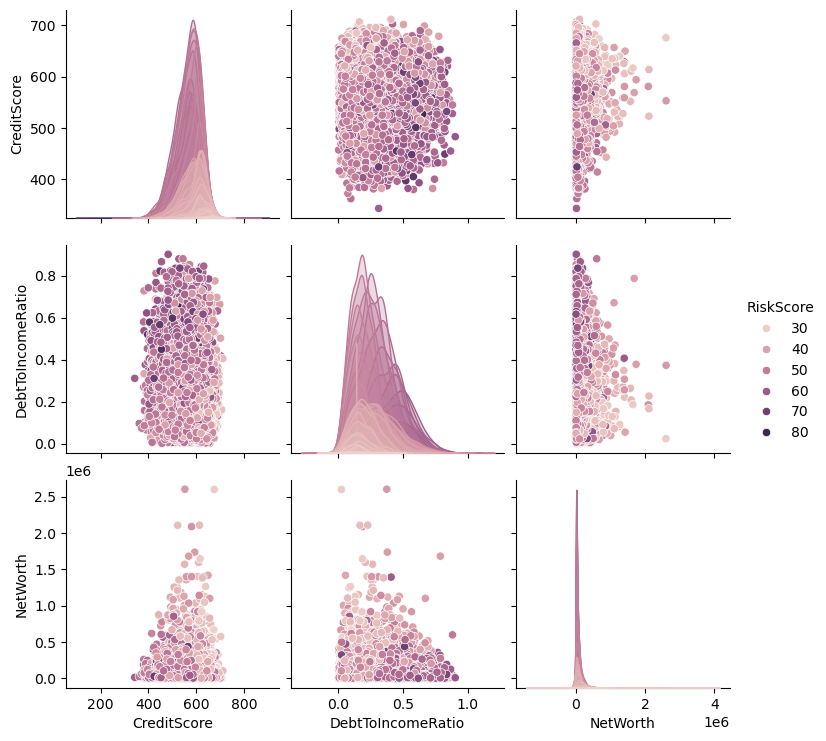

In [8]:
plt.figure(figsize= (50,50))
sns.pairplot(df, hue = 'RiskScore', vars = df[[
    'CreditScore', 'DebtToIncomeRatio', 'NetWorth']])
plt.show()



# Preprocessing

In [10]:
# dropping columns 
df.drop(columns = ['ApplicationDate'], inplace = True)
df.drop (columns = ['LoanApproved'], inplace = True)
df.shape

(20000, 34)

In [11]:
#changing categorical values 
df = pd.get_dummies(df, columns = ['LoanPurpose','HomeOwnershipStatus','MaritalStatus','EducationLevel','EmploymentStatus'], drop_first = True, dtype = int)

In [12]:
df.shape

(20000, 45)

In [13]:
df.shape

(20000, 45)

In [14]:
df.columns

Index(['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount',
       'LoanDuration', 'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'NetWorth', 'BaseInterestRate', 'InterestRate',
       'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'RiskScore',
       'LoanPurpose_Debt Consolidation', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other', 'HomeOwnershipStatus_Other',
       'HomeOwnershipStatus_Own', 'HomeOwnershipStatus_Rent',
       'MaritalStatus_Married', 'MaritalStatus_Single',
       'MaritalStatus_Widowed', 'EducationLevel_Bachelor',
       'EducationLevel_Doctorate', 'Educati

# Experiment 1: No standardization

In [16]:
x = df.drop(columns = ['RiskScore'], axis =1)
y = df['RiskScore']

In [17]:
x

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,HomeOwnershipStatus_Rent,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,45,39948,617,22,13152,48,2,183,0.354418,1,...,0,1,0,0,0,0,0,1,0,0
1,38,39709,628,15,26045,48,1,496,0.087827,5,...,0,0,1,0,0,0,0,0,0,0
2,47,40724,570,26,17627,36,2,902,0.137414,2,...,1,1,0,0,1,0,0,0,0,0
3,58,69084,545,34,37898,96,1,755,0.267587,2,...,0,0,1,0,0,0,1,0,0,0
4,37,103264,594,17,9184,36,1,274,0.320535,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,19,24521,36,3,673,0.101288,5,...,1,1,0,0,0,0,1,0,0,0
19996,56,49246,567,33,25818,36,5,414,0.471818,2,...,1,1,0,0,0,0,0,0,0,0
19997,44,48958,645,20,37033,72,3,512,0.216596,3,...,0,1,0,0,1,0,0,0,0,0
19998,60,41025,560,36,14760,72,3,986,0.364758,4,...,0,1,0,0,0,0,1,0,0,0


In [18]:
y

0        49.0
1        52.0
2        52.0
3        54.0
4        36.0
         ... 
19995    55.0
19996    54.0
19997    45.0
19998    59.0
19999    59.0
Name: RiskScore, Length: 20000, dtype: float64

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16000, 44), (4000, 44), (16000,), (4000,))

In [108]:
model = LinearRegression()
model.fit(x_train, y_train)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Coefficients: [-1.93796543e-02 -1.58383793e-05 -8.65810049e-03 -1.19212530e-02
  2.69182528e-05 -5.18886663e-03 -1.47036561e-02  1.22356462e-03
  4.80748127e+00 -1.37789739e-02  2.91390390e-02  1.54395535e+01
  1.31764204e+01  6.93075414e+00 -2.86899564e-02 -1.67686657e-01
 -2.12615691e-06  3.94431393e-06 -2.97129261e-06  3.28600423e-06
 -9.10217683e-04 -5.62311483e-02 -2.60325589e-02 -1.74309425e-05
  5.02703745e-09  3.13137510e+01  5.65665556e-04 -2.91712545e-01
  1.79532918e-01 -5.43526576e-03  1.04666262e-01  1.93402255e-01
  3.03828032e-01  9.76760474e-03  2.84914060e-01  1.19878600e-01
  1.98353657e-02  2.96374782e-01 -5.04762342e-01 -1.70814921e+00
  3.43203227e-01 -1.18549050e+00  2.85029262e+00  3.50906414e+00]
Intercept: 50.47614353358879


,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,HomeOwnershipStatus_Rent,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
5894,45,15000,620,21,17419,36,3,519,0.368528,3,...,0,1,0,0,0,0,0,0,0,0
3728,25,49855,486,3,18998,48,5,404,0.148286,2,...,0,1,0,0,0,0,0,1,0,0
8958,51,38932,576,30,17844,72,1,491,0.411293,1,...,1,1,0,0,0,0,0,1,0,0
7671,18,58116,516,0,24050,60,0,831,0.141719,3,...,0,1,0,0,0,0,1,0,0,1
5999,25,62939,562,3,27263,36,0,766,0.232934,3,...,1,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,32,37134,569,10,31048,48,3,562,0.294523,6,...,0,1,0,0,0,0,1,0,0,0
11964,30,15000,618,6,17491,48,1,595,0.509344,5,...,0,0,0,1,1,0,0,0,0,0
5390,31,48088,517,4,11381,120,0,464,0.230245,1,...,0,1,0,0,0,0,0,1,0,0
860,42,15265,606,20,10643,60,1,298,0.574049,2,...,1,1,0,0,1,0,0,0,0,0


## Evaulate

In [23]:
y_pred = model.predict(x_test)

In [24]:
#Mean square error and R^2 
mse = mean_squared_error(y_test, y_pred)  
r2 = r2_score(y_test, y_pred)          
rmse = rmse = np.sqrt(mse)

In [25]:
mse , r2 , rmse 

(14.14343150812928, 0.7722014789286128, 3.760775386556512)

In [26]:
print (f"MSE:{mse} R-squared {r2} RMSE {rmse}")

MSE:14.14343150812928 R-squared 0.7722014789286128 RMSE 3.760775386556512


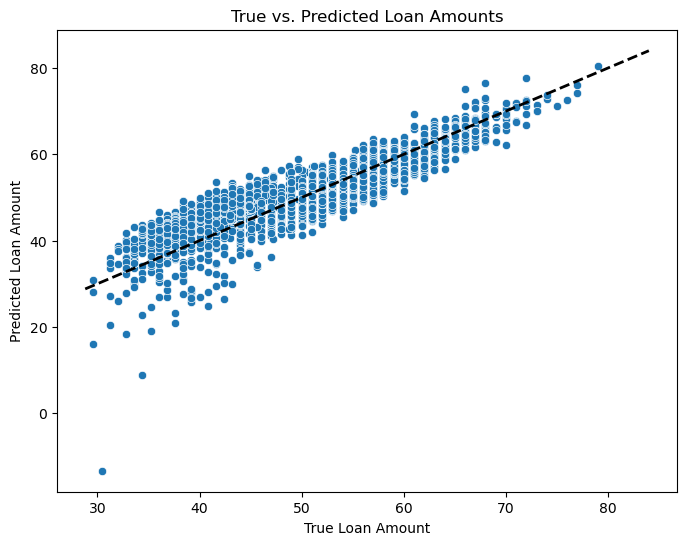

In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("True vs. Predicted Loan Amounts")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

# Expirement 2 Standardize

In [29]:
scaler = StandardScaler()

In [30]:
x_train_scaled = scaler.fit_transform(x_train)

In [31]:
pd.DataFrame(x_train_scaled, columns=x_train.columns)

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,HomeOwnershipStatus_Rent,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed
0,0.446269,-1.094713,0.948834,0.301610,-0.557476,-0.736562,1.068494,0.268462,0.513162,-0.013471,...,-0.663922,0.990050,-0.657188,-0.233462,-0.657188,-0.223775,-0.651830,-0.421010,-0.293127,-0.274615
1,-1.274534,-0.225737,-1.685455,-1.287727,-0.440814,-0.250803,2.510395,-0.208860,-0.862547,-0.589770,...,-0.663922,0.990050,-0.657188,-0.233462,-0.657188,-0.223775,-0.651830,2.375239,-0.293127,-0.274615
2,0.962509,-0.498061,0.083844,1.096278,-0.526075,0.720714,-0.373407,0.152244,0.780285,-1.166069,...,1.506201,0.990050,-0.657188,-0.233462,-0.657188,-0.223775,-0.651830,2.375239,-0.293127,-0.274615
3,-1.876815,-0.019781,-1.095689,-1.552616,-0.067558,0.234955,-1.094358,1.563455,-0.903567,-0.013471,...,-0.663922,0.990050,-0.657188,-0.233462,-0.657188,-0.223775,1.534143,-0.421010,-0.293127,3.641463
4,-1.274534,0.100462,-0.191380,-1.287727,0.169828,-0.736562,-1.094358,1.293665,-0.333809,-0.013471,...,1.506201,0.990050,-0.657188,-0.233462,1.521636,-0.223775,-0.651830,-0.421010,-0.293127,-0.274615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,-0.672253,-0.542887,-0.053768,-0.669651,0.449476,-0.250803,1.068494,0.446938,0.050900,1.715426,...,-0.663922,0.990050,-0.657188,-0.233462,-0.657188,-0.223775,1.534143,-0.421010,-0.293127,-0.274615
15996,-0.844333,-1.094713,0.909517,-1.022837,-0.552156,-0.250803,-0.373407,0.583909,1.392745,1.139127,...,-0.663922,-1.010051,-0.657188,4.283344,1.521636,-0.223775,-0.651830,-0.421010,-0.293127,-0.274615
15997,-0.758293,-0.269791,-1.076030,-1.199430,-1.003581,2.663747,-1.094358,0.040177,-0.350602,-1.166069,...,-0.663922,0.990050,-0.657188,-0.233462,-0.657188,-0.223775,-0.651830,2.375239,-0.293127,-0.274615
15998,0.188148,-1.088107,0.673610,0.213313,-1.058107,0.234955,-0.373407,-0.648826,1.796921,-0.589770,...,1.506201,0.990050,-0.657188,-0.233462,1.521636,-0.223775,-0.651830,-0.421010,-0.293127,-0.274615


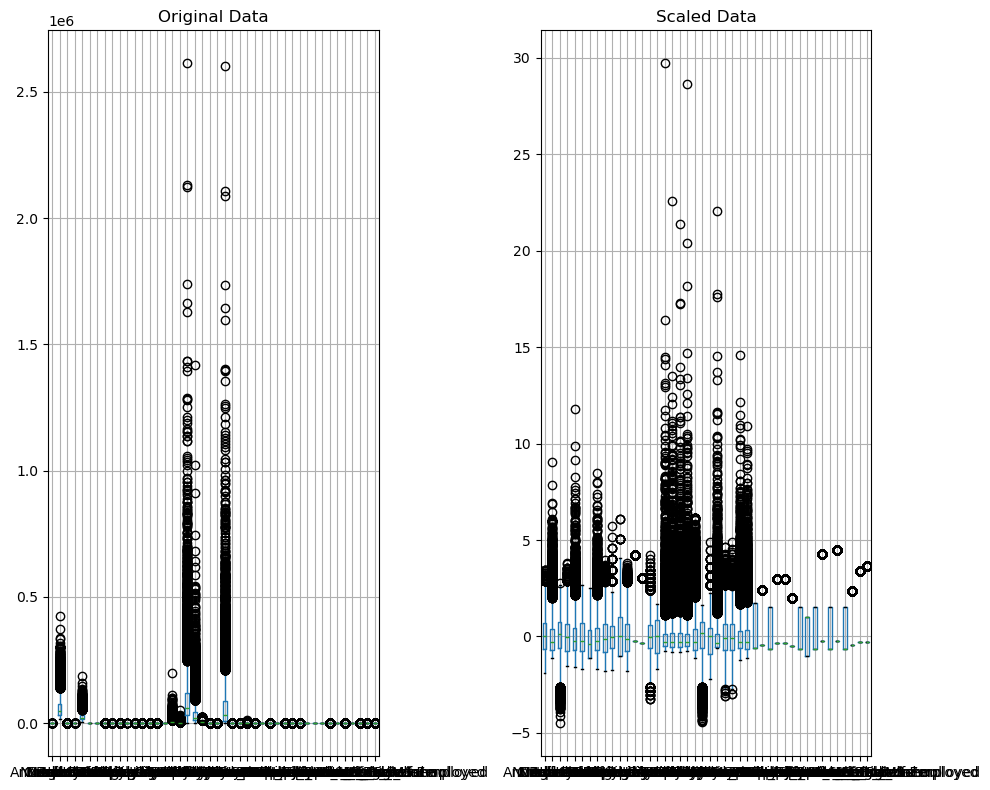

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(10, 8))
pd.DataFrame(x_train, columns=x_train.columns).boxplot(ax=axes[0])
axes[0].set_title('Original Data')
pd.DataFrame(x_train_scaled, columns=x_train.columns).boxplot(ax=axes[1])
axes[1].set_title('Scaled Data')
plt.tight_layout()
plt.show()

In [33]:
x_test_scaled = scaler.transform(x_test)
x_train_scaled = scaler.fit_transform(x_train)

In [34]:
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [35]:
y_pred = model.predict(x_test_scaled)

In [36]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [37]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-2.25436012e-01 -6.35081461e-01  3.48174120e+11 -1.34852162e-01
 -1.85285181e+11 -2.81815465e+11 -2.04190030e-02  2.94942986e-01
  7.69582814e-01 -2.37792355e-02  2.88650419e-02  2.47961811e+00
  2.95204870e+00  2.07572687e+00 -1.42085759e-01 -1.40404602e+00
 -1.39634436e-02  8.90330270e-03 -3.49423976e-01  1.58467276e-01
 -2.98208470e+00 -6.73987981e-03 -5.82780221e-02 -1.99739315e+00
  4.86712923e+11  1.32027968e+00  3.85991934e-01 -9.98941713e-02
  7.79654490e-02 -1.93230541e-03  4.77409040e-02  5.81150201e-02
  9.12471801e-02  3.94443866e-03  1.31280589e-01  5.99520900e-02
  9.08681536e-03  6.56914492e-02 -2.31641619e-01 -3.63975322e-01
  1.56974411e-01 -4.23840870e-01  7.69355565e-01  8.95974478e-01]
Intercept: 50.8437244888521


In [38]:
mse, r2, rmse

(14.143353431726183, 0.7722027364515234, 3.7607650061824103)

In [39]:
print (f"MSE:{mse} R-squared {r2} RMSE {rmse}")

MSE:14.143353431726183 R-squared 0.7722027364515234 RMSE 3.7607650061824103


In [40]:
model.score(x_train_scaled,y_train)

0.7886749015880148

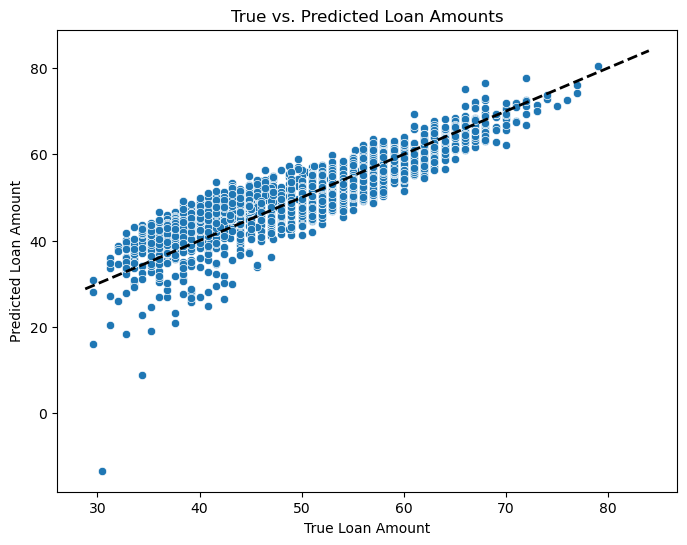

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("True vs. Predicted Loan Amounts")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

### Expirement 3 PCA

In [43]:
### Now that our data is standardized we can perform Dimensionality Reduction
pca = PCA(n_components=0.95)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

In [44]:
model = LinearRegression()
model.fit(x_train_pca, y_train)

LinearRegression()

In [45]:
y_pred = model.predict(x_test_pca)

In [98]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 1.90523805  0.92949276 -0.44764088 -1.80925907 -0.96729562  0.16588617
 -0.40557482 -0.2054357   0.0207056   0.15228971  0.52560775  0.30112658
 -0.25252292  0.83835617 -0.75313014 -0.4741031  -0.2372231   0.92374769
  1.00681228 -1.14792732 -0.0332622  -1.8659319   1.86567342  0.74089321
 -1.89258647 -0.12648269 -0.03083753  0.8301761  -1.36539607 -0.22942757
  1.68545449  1.27700872  0.17733467]
Intercept: 50.84360000000001


In [46]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

In [47]:
mse, r2, rmse

(14.599191682165017, 0.7648608633538914, 3.8208888602215345)

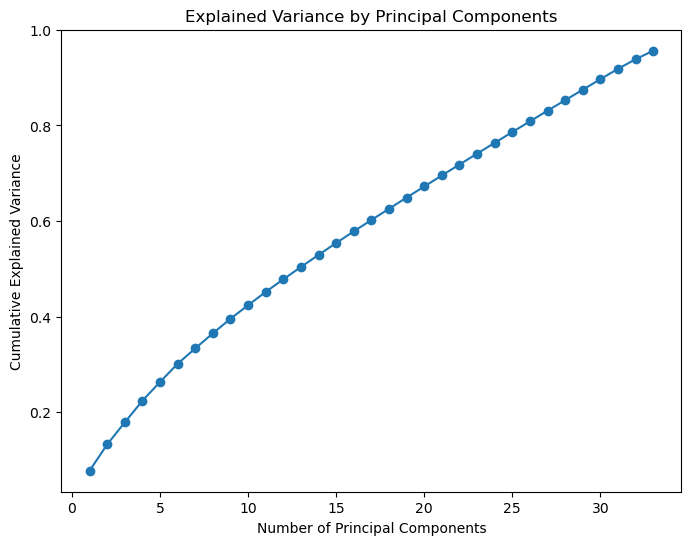

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

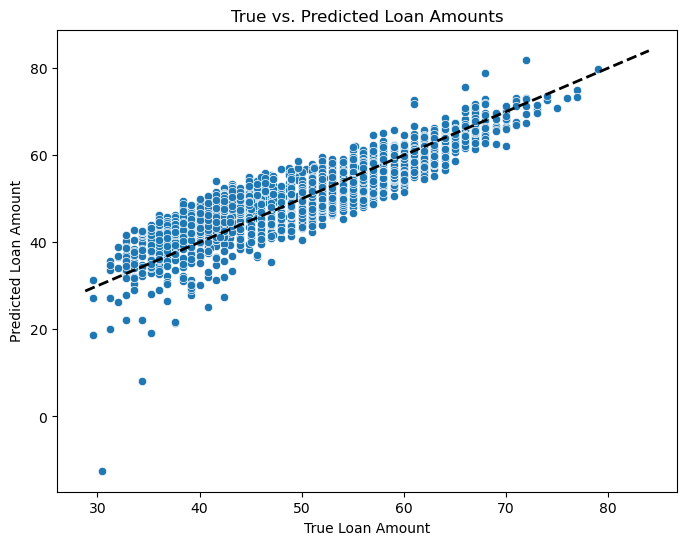

In [49]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("True Loan Amount")
plt.ylabel("Predicted Loan Amount")
plt.title("True vs. Predicted Loan Amounts")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()


In [50]:
model.coef_

array([ 1.90523805,  0.92949276, -0.44764088, -1.80925907, -0.96729562,
        0.16588617, -0.40557482, -0.2054357 ,  0.0207056 ,  0.15228971,
        0.52560775,  0.30112658, -0.25252292,  0.83835617, -0.75313014,
       -0.4741031 , -0.2372231 ,  0.92374769,  1.00681228, -1.14792732,
       -0.0332622 , -1.8659319 ,  1.86567342,  0.74089321, -1.89258647,
       -0.12648269, -0.03083753,  0.8301761 , -1.36539607, -0.22942757,
        1.68545449,  1.27700872,  0.17733467])

In [102]:
model.score(x_train_pca,y_train)

0.777074553275314

In [100]:
print (f"MSE:{mse} R-squared {r2} RMSE {rmse}")

MSE:14.599191682165017 R-squared 0.7648608633538914 RMSE 3.8208888602215345
